<a href="https://colab.research.google.com/github/swap-253/COVID-19-Radiography-Results-Prediction-Using-CNNs/blob/main/CausalImpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv('txt1.csv')
df.head()

,COUNTRY,COMPANY,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,ID
0,Germany,CarryFive Enterprises,BR013,DISHWASHER PRODUCTS,S_4551211540772,TABLETS WITH SOLUBLE FILM,2020-02-29,0,0.0,0.0,0.0,0.0,2018-10-13_S_4551211540772
1,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_1941017257445,AUTOMATIC SPRAY,2020-07-18,149,1461.7,149.0,1462.0,32.0,2019-03-02_S_1941017257445
2,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_6465079411571,AUTOMATIC SPRAY,2020-06-06,50,198.9,50.0,198.9,9.0,2019-01-19_S_6465079411571
3,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4071113797455,STANDARD SPRAY,2019-08-17,0,0.0,0.0,0.0,0.0,2018-03-31_S_4071113797455
4,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4717130715785,PORTABLE ELECTRICAL,2019-12-21,0,0.0,0.0,0.0,0.0,2018-08-04_S_4717130715785


In [ ]:
df['PRICE_UNIT']=df['AMT_VALUE']/df['UNITS']
df['PRICE_UNIT'].fillna(0,inplace=True)

In [ ]:
df_c5= df[df['COMPANY']=='CarryFive Enterprises']
df_c5.head()

,COUNTRY,COMPANY,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,ID
0,Germany,CarryFive Enterprises,BR013,DISHWASHER PRODUCTS,S_4551211540772,TABLETS WITH SOLUBLE FILM,2020-02-29,0,0.0,0.0,0.0,0.0,2018-10-13_S_4551211540772
1,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_1941017257445,AUTOMATIC SPRAY,2020-07-18,149,1461.7,149.0,1462.0,32.0,2019-03-02_S_1941017257445
2,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_6465079411571,AUTOMATIC SPRAY,2020-06-06,50,198.9,50.0,198.9,9.0,2019-01-19_S_6465079411571
3,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4071113797455,STANDARD SPRAY,2019-08-17,0,0.0,0.0,0.0,0.0,2018-03-31_S_4071113797455
4,Germany,CarryFive Enterprises,BR014,AIRCARE - MAIN,S_4717130715785,PORTABLE ELECTRICAL,2019-12-21,0,0.0,0.0,0.0,0.0,2018-08-04_S_4717130715785


In [ ]:
# df_fin=df_c5.drop(['ID','COUNTRY','COMPANY'],axis=1)
df_fin=df.drop(['ID','COUNTRY'],axis=1)
df_fin=df_fin.sort_values(by=['PRODUCT_CODE','WEEK_END_DATE'])
df_fin.head()

,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,PRICE_UNIT
17229,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-08-17,0,0.0,0.0,0.0,0.0,0.0
306268,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-08-24,0,0.0,0.0,0.0,0.0,0.0
17228,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-08-31,0,0.0,0.0,0.0,0.0,0.0
175142,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-09-07,0,0.0,0.0,0.0,0.0,0.0
124859,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-09-14,0,0.0,0.0,0.0,0.0,0.0


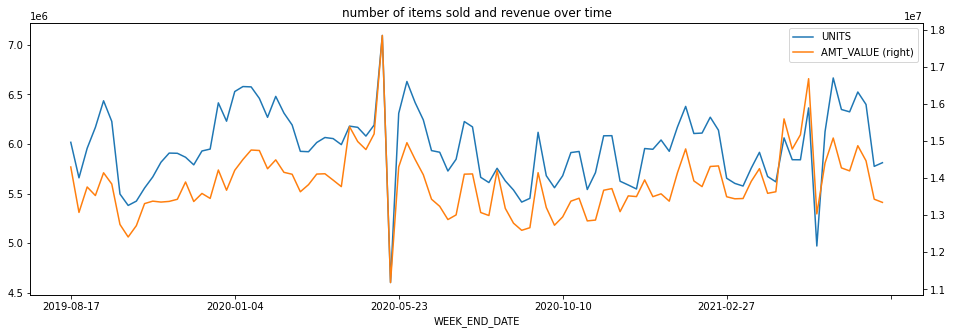

In [ ]:
df_fin.groupby('WEEK_END_DATE').agg(
    {'UNITS': 'sum', 'AMT_VALUE': 'sum'}
).plot(
    title='number of items sold and revenue over time', 
    secondary_y='AMT_VALUE',
    figsize=(16, 5)
)

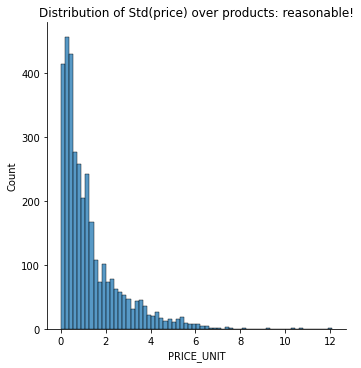

In [ ]:
import seaborn as sns
sns.displot(df_fin.groupby('PRODUCT_CODE').PRICE_UNIT.std().dropna().clip(0, 15), kde=False)
plt.title('Distribution of Std(price) over products: reasonable!');

In [ ]:
df_mdl = df_fin[
    (df_fin.groupby('PRODUCT_CODE').PRICE_UNIT.transform('std') > 0)
]
del df_fin

In [ ]:
len(df_mdl)

341775

In [ ]:
df_mdl = df_mdl.assign(
    LnP = np.log(df_mdl['PRICE_UNIT']),
    LnQ = np.log(df_mdl['UNITS']),
)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_mdl[['LnP', 'LnQ']].cov()


,LnP,LnQ
LnP,0.612656,-0.107889
LnQ,-0.107889,9.629506


In [ ]:
e=-0.079435/0.443932
e

-0.17893506212663202

In [ ]:
df_mdl.head()

,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,PRICE_UNIT,LnP,LnQ
17229,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-08-17,0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
306268,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-08-24,0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
17228,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-08-31,0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
175142,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-09-07,0,0.0,0.0,0.0,0.0,0.0,-inf,-inf
124859,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-09-14,0,0.0,0.0,0.0,0.0,0.0,-inf,-inf


In [ ]:
df_mdl=df_mdl[df_mdl['LnP']!=-np.inf]

In [ ]:
import statsmodels.api as sm # get full stats on regressions

def binned_ols(df, x, y, n_bins, plot=True, plot_title='', plot_ax=None, **plt_kwargs):
    # A visual form of de-noising: bin explanatory variable first, 
    # then take means-per-bin of variable to be explaioned, then
    # regress/plot 
    x_bin = x + '_bin'
    df[x_bin] = pd.qcut(df[x].rank(method='first'), n_bins)

    tmp = df.groupby(x_bin).agg({
        x: 'mean',
        y: 'mean'
    })

    if plot:
        tmp.plot(
            x=x, 
            y=y,
            figsize=(18, 6),
            title=plot_title,
            ax=plot_ax,
            **plt_kwargs
        )
    
    del df[x_bin]
    mdl = sm.OLS(tmp[y], sm.add_constant(tmp[x]))
    res = mdl.fit()
    return res

"Naive" elasticity estimated to be -0.21701423535952308


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LnQ   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.5884
Date:                Thu, 05 May 2022   Prob (F-statistic):              0.453
Time:                        12:27:34   Log-Likelihood:                -26.794
No. Observations:                  20   AIC:                             57.59
Df Residuals:                      18   BIC:                             59.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8037      0.359     16.146      0.000       5.049       6.559
LnP           -0.2170      0.283     -0.767      0.453      -0.811       0.377
==============================================================================
Omnibus:                       10.134   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.380
Skew:                          -1.031   Prob(JB):                       0.0151
Kurtosis:                       5.409   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

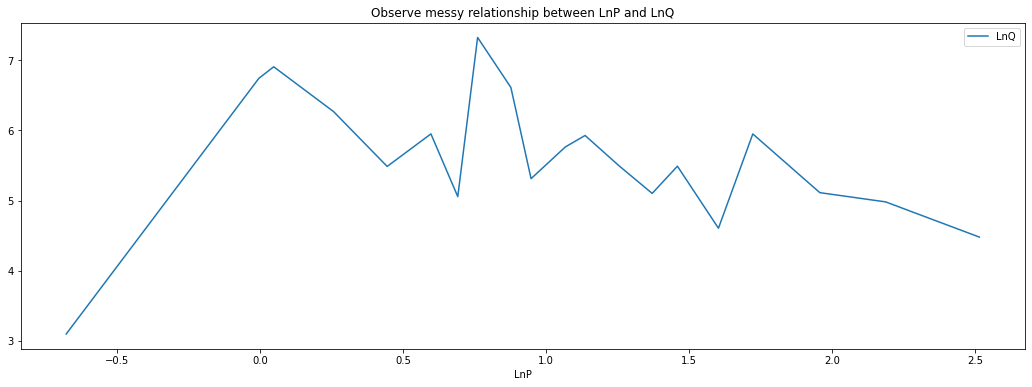

In [ ]:
ols_fit = binned_ols(
    df_mdl,
    x='LnP',
    y='LnQ',
    n_bins=20,
    plot_title='Observe messy relationship between LnP and LnQ'
)

print(f'"Naive" elasticity estimated to be {ols_fit.params["LnP"]}')
ols_fit.summary()

In [ ]:
import sklearn.preprocessing
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df_mdl=df_mdl[df_mdl['UNITS']>0]
df_mdl1=df_mdl[df_mdl['UNITS']<13000]
df_mdl1=df_mdl1[df_mdl1['PRICE_UNIT']>0]
len(df_mdl1)

135253

In [ ]:
feature_generator_basic = ColumnTransformer(
    [
        ('PRODUCT_CODE', OneHotEncoder(), ['PRODUCT_CODE']),
        ('WEEK_END_DATE', OneHotEncoder(), ['WEEK_END_DATE']),
        ('FORMAT', OneHotEncoder(), ['FORMAT']),
        ('CATEGORY', OneHotEncoder(), ['CATEGORY']),   
        ('BRAND', OneHotEncoder(), ['BRAND']),
        ('LnP', 'passthrough', ['LnP']),
    ], remainder='drop'
)

mdl_basic = Pipeline([
    ('feat_proc', feature_generator_basic),
    ('reg', linear_model.PoissonRegressor(
        alpha=1e-6,  # l2 penalty strength; manually selected value for minimum interference on LnP-coef (elasticity)
        fit_intercept=False, # no need, since we have OneHot encodings without drop
        max_iter=300_000, 
    )),
], verbose=True)

mdl_basic_ols = Pipeline([
    ('feat_proc', feature_generator_basic),
    ('reg', linear_model.Ridge(
        alpha=1e-20,  # l2 penalty strength, "very small"
        fit_intercept=False, 
        max_iter=100_000, 
    )),
], verbose=True)

In [ ]:
mdl_basic.fit(
    df_mdl1[['LnP', 'PRODUCT_CODE', 'WEEK_END_DATE', 'BRAND','CATEGORY','FORMAT']], 
    df_mdl1['UNITS'] 
    # Poisson regression has log-link, so LnQ is implicit in loss function
)

[Pipeline] ......... (step 1 of 2) Processing feat_proc, total=   0.3s
[Pipeline] ............... (step 2 of 2) Processing reg, total= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('PRODUCT_CODE',
                                                  OneHotEncoder(),
                                                  ['PRODUCT_CODE']),
                                                 ('WEEK_END_DATE',
                                                  OneHotEncoder(),
                                                  ['WEEK_END_DATE']),
                                                 ('FORMAT', OneHotEncoder(),
                                                  ['FORMAT']),
                                                 ('CATEGORY', OneHotEncoder(),
                                                  ['CATEGORY']),
                                                 ('BRAND', OneHotEncoder(),
                                                  ['BRAND']),
                                                 ('LnP', 'passthrough',
                                                  ['LnP'])])),
       

In [ ]:
mdl_basic_ols.fit(
    df_mdl1[['LnP', 'PRODUCT_CODE', 'WEEK_END_DATE', 'BRAND','CATEGORY','FORMAT']], 
    df_mdl1['LnQ'] # log-normal
)

[Pipeline] ......... (step 1 of 2) Processing feat_proc, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing reg, total=   0.2s


Pipeline(steps=[('feat_proc',
                 ColumnTransformer(transformers=[('PRODUCT_CODE',
                                                  OneHotEncoder(),
                                                  ['PRODUCT_CODE']),
                                                 ('WEEK_END_DATE',
                                                  OneHotEncoder(),
                                                  ['WEEK_END_DATE']),
                                                 ('FORMAT', OneHotEncoder(),
                                                  ['FORMAT']),
                                                 ('CATEGORY', OneHotEncoder(),
                                                  ['CATEGORY']),
                                                 ('BRAND', OneHotEncoder(),
                                                  ['BRAND']),
                                                 ('LnP', 'passthrough',
                                                  ['LnP'])])),
       

In [ ]:
print('"Econometrically" estimated elasticity with unit-, time-, and market- controls, using Poisson loss (coef on LnP):')
coef = pd.DataFrame({
    'feat': mdl_basic['feat_proc'].get_feature_names(),
    'coef': mdl_basic['reg'].coef_
})
coef.iloc[-1]

"Econometrically" estimated elasticity with unit-, time-, and market- controls, using Poisson loss (coef on LnP):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feat         LnP
coef   -0.391387
Name: 3548, dtype: object

In [ ]:
print('"Econometrically" estimated elasticity with unit-, time-, and market- controls, using log-Normal loss (coef on LnP):')
pd.DataFrame({
    'feat': mdl_basic_ols['feat_proc'].get_feature_names(),
    'coef': mdl_basic_ols['reg'].coef_
}).iloc[-1]

"Econometrically" estimated elasticity with unit-, time-, and market- controls, using log-Normal loss (coef on LnP):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feat         LnP
coef    0.503966
Name: 3548, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


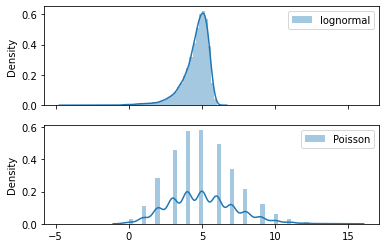

In [ ]:
# The significant difference in estimates for log-normal vs. Poisson
# is explained by Poisson's fat tails: noisy/extreme values have a stronger
# effect in log-normal than in Poisson.
f, ax = plt.subplots(2, 1, sharex=True)
pos_normal = np.random.normal(loc=100, scale=100, size=12_000)
pos_normal = pos_normal[pos_normal > 0]
sns.distplot(np.log(pos_normal), label='lognormal', ax=ax[0])
sns.distplot(np.random.poisson(lam=5, size=10_000), label='Poisson', ax=ax[1])

ax[0].legend()
ax[1].legend()

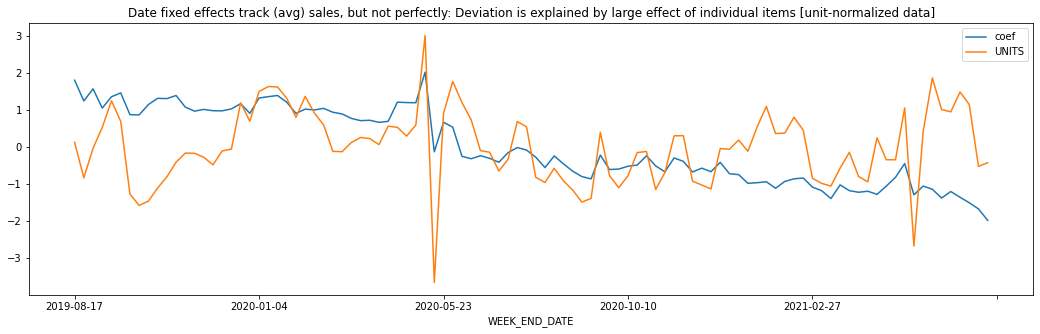

In [ ]:
# For some intuition about this regression, convince ourselves that
# the time fixed effects do inded track quantity sold over time
# The divergence of q and time-coefs at the beginning and end likely 
# points towards new products that are introduced/old ones that are faded out
(
    pd.concat(
        [
            coef[coef.feat.str.startswith('WEEK_END_DATE')].reset_index(drop=True),
            df_mdl.groupby('WEEK_END_DATE').UNITS.sum().reset_index()
        ], 
        axis=1
    )
    .set_index(['WEEK_END_DATE'])
    .drop(columns=['feat'])
    .pipe(
        lambda d: (d - d.mean()) / d.std()
    )
).plot(
    figsize=(18, 5),
    title='Date fixed effects track (avg) sales, but not perfectly: Deviation is explained by large effect of individual items [unit-normalized data]'
)

In [ ]:
# Note that de-meaning happens on StockCode-level here!
df_mdl1['dLnP'] = np.log(df_mdl1.PRICE_UNIT) - np.log(df_mdl1.groupby('PRODUCT_CODE').PRICE_UNIT.transform('mean'))
df_mdl1['dLnQ'] = np.log(df_mdl1.UNITS) - np.log(df_mdl1.groupby('PRODUCT_CODE').UNITS.transform('mean')) 

In [ ]:
df_mdl1[['dLnP', 'dLnQ']].cov()

,dLnP,dLnQ
dLnP,0.130611,0.098935
dLnQ,0.098935,3.232075


In [ ]:
e= -0.010252/0.100742
e

-0.10176490440928312

In [ ]:
df_mdl1['WEEK_END_DATE']=pd.to_datetime(df_mdl1['WEEK_END_DATE'])
df_mdl1.dtypes

BRAND                       object
CATEGORY                    object
PRODUCT_CODE                object
FORMAT                      object
WEEK_END_DATE       datetime64[ns]
UNITS                        int64
AMT_VALUE                  float64
BASE_UNITS                 float64
BASE_AMT_VALUE             float64
ACV_DISTRIBUTION           float64
PRICE_UNIT                 float64
LnP                        float64
LnQ                        float64
dLnP                       float64
dLnQ                       float64
dtype: object

In [ ]:
df_mdl2 = df_mdl1.assign(
    month = lambda d: d.WEEK_END_DATE.dt.month,
    DoM =   lambda d: d.WEEK_END_DATE.dt.day,
    DoW =   lambda d: d.WEEK_END_DATE.dt.weekday,
    stock_age_days = lambda d: 
        (d.WEEK_END_DATE - d.groupby('PRODUCT_CODE').WEEK_END_DATE.transform('min')).dt.days,
    sku_avg_p = lambda d: 
        d.groupby('PRODUCT_CODE').PRICE_UNIT.transform('median')
)

In [ ]:
df_mdl2.head()

,BRAND,CATEGORY,PRODUCT_CODE,FORMAT,WEEK_END_DATE,UNITS,AMT_VALUE,BASE_UNITS,BASE_AMT_VALUE,ACV_DISTRIBUTION,PRICE_UNIT,LnP,LnQ,dLnP,dLnQ,month,DoM,DoW,stock_age_days,sku_avg_p
309792,BR070,AIRCARE - HOME,S_0000000370170,CAR AIRFRESHNERS,2019-10-26,1,1.5,1.0,1.5,0.0,1.500000,0.405465,0.000000,0.000000,0.000000,10,26,5,0,1.500000
11138,BR035,AIRCARE - MAIN,S_0000002454256,CANDLES,2019-08-17,9013,21830.9,1636.3,6206.8,55.0,2.422157,0.884658,9.106423,0.075128,0.668526,8,17,5,0,2.300673
224178,BR035,AIRCARE - MAIN,S_0000002454256,CANDLES,2019-08-24,7580,18415.6,1610.1,5788.2,54.4,2.429499,0.887685,8.933268,0.078154,0.495371,8,24,5,7,2.300673
129143,BR035,AIRCARE - MAIN,S_0000002454256,CANDLES,2019-08-31,4927,13223.5,2377.2,7941.6,52.2,2.683885,0.987265,8.502486,0.177735,0.064588,8,31,5,14,2.300673
96163,BR035,AIRCARE - MAIN,S_0000002454256,CANDLES,2019-09-07,2510,7752.9,1764.3,5907.3,41.4,3.088805,1.127784,7.828038,0.318254,-0.609859,9,7,5,21,2.300673


In [ ]:
df_mdl2['FORMAT'].value_counts()

CANDLES                           25781
CAR AIRFRESHNERS                  16714
ELECTRICALS                       14299
AUTOMATIC SPRAY                   11437
OTHER SLOW RELEASE - WAX MELTS     9483
SPRAY                              7891
LIQUID                             7396
STANDARD SPRAY                     6138
TABLETS WITH SOLUBLE FILM          5655
WIPES                              4336
LIQUID WICK                        4291
GEL                                3706
POWDER                             3286
TABLETS                            3042
BLOCK                              2786
OTHER                              2056
CONCENTRATED SPRAY                 1405
PORTABLE ELECTRICAL                1297
TOTAL GELS                          646
OTHER SLOW RELEASE                  527
CREAM                               506
LIQUID GEL                          501
DISINFECTANT LIQUIDS                464
GRAN                                351
FOAM                                305


In [ ]:
df_mdl2.columns

Index(['BRAND', 'CATEGORY', 'PRODUCT_CODE', 'FORMAT', 'WEEK_END_DATE', 'UNITS',
       'AMT_VALUE', 'BASE_UNITS', 'BASE_AMT_VALUE', 'ACV_DISTRIBUTION',
       'PRICE_UNIT', 'LnP', 'LnQ', 'dLnP', 'dLnQ', 'month', 'DoM', 'DoW',
       'stock_age_days', 'sku_avg_p'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
feature_generator_full = ColumnTransformer(
    [
        # do NOT include to reduce overfit (price is sku-level-demeaned anyway): 
        # ('StockCode', OneHotEncoder(), ['StockCode']), 
        ('WEEK_END_DATE', OneHotEncoder(), ['WEEK_END_DATE']),
        ('FORMAT', CountVectorizer(min_df=0.0025, ngram_range=(1, 3)), 'FORMAT'),
        ('CATEGORY', OneHotEncoder(), ['CATEGORY']),   
        # ('BRAND', OneHotEncoder(), ['BRAND']),
        ('numeric_feats', StandardScaler(), ['month', 'DoM', 'DoW', 'stock_age_days', 'sku_avg_p']),
    ], remainder='drop'
)

In [ ]:
model_y = Pipeline([
    ('feat_proc', feature_generator_full),
    ('model_y', RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, verbose=0)) 
    # n_samples_leaf/n_estimators is set to reduce model (file) size and runtime
    # larger models yield prettier plots.
])
model_t = Pipeline([
    ('feat_proc', feature_generator_full),
    ('model_t', RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, verbose=0))
])

In [ ]:
import joblib

try: # load existing models, if possible
    model_y = joblib.load('models/step1_model_y.joblib')
    model_t = joblib.load('models/step1_model_t.joblib')
except:
    print('No pre-existing models found, fitting aux models for y and t')
    model_y.fit(df_mdl2, df_mdl2.dLnQ)
    model_t.fit(df_mdl2, df_mdl2.dLnP)

No pre-existing models found, fitting aux models for y and t


In [ ]:
# Get first-step, predictions to residualize ("orthogonalize") with (in-sample for now)
q_hat = model_y.predict(df_mdl2)
p_hat = model_t.predict(df_mdl2)

In [ ]:
df_mdl2 = df_mdl2.assign(
    dLnP_res = df_mdl2['dLnP'] - p_hat,
    dLnQ_res = df_mdl2['dLnQ'] - q_hat,
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


"Average" elasticity estimated using DML to be -0.328
Note that this is close to our econometric contols - some difference comes from the different distribution assumptions (Poisson vs. log-normal)


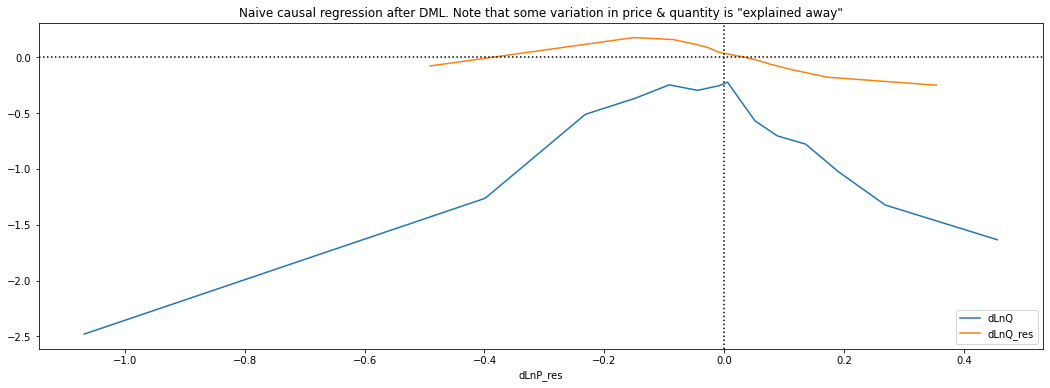

In [ ]:
old_fit = binned_ols(
    df_mdl2,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
)

old_fit = binned_ols(
    df_mdl2,
    x='dLnP_res',
    y='dLnQ_res',
    n_bins=15,
    plot_title='Naive causal regression after DML. Note that some variation in price & quantity is "explained away"',
    plot_ax=plt.gca()
)

plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


print(
    f'"Average" elasticity estimated using DML to be {old_fit.params["dLnP_res"]:.3f}\n'
    'Note that this is close to our econometric contols - some difference comes from the different distribution '
    'assumptions (Poisson vs. log-normal)'
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


"Average" elasticity estimated using DML (now supposedly valid estimate!) to be -0.328
Note that this is close to our econometric contols - some difference comes from the different distribution assumptions (Poisson vs. log-normal)


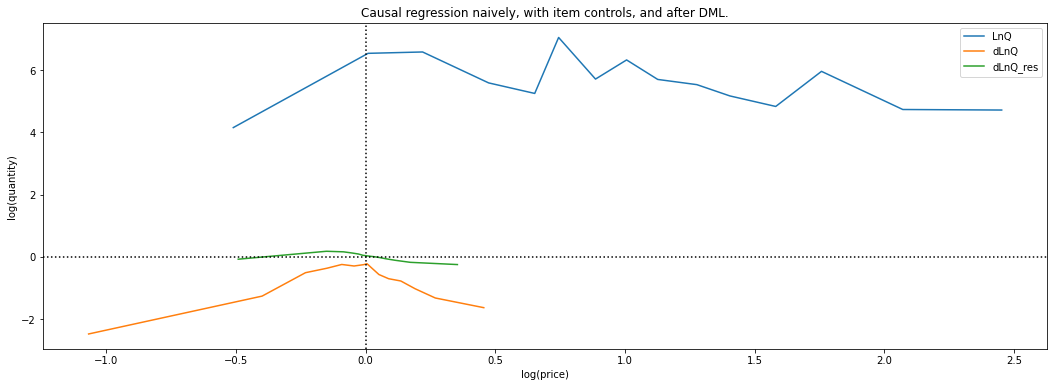

In [ ]:
old_fit = binned_ols(
    df_mdl,
    x='LnP',
    y='LnQ',
    n_bins=15,
)

old_fit = binned_ols(
    df_mdl2,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
    plot_ax=plt.gca(),
)

old_fit = binned_ols(
    df_mdl2,
    x='dLnP_res',
    y='dLnQ_res',
    n_bins=15,
    plot_title='Causal regression naively, with item controls, and after DML.',
    plot_ax=plt.gca()
)
plt.gca().set(
    xlabel='log(price)',
    ylabel='log(quantity)',    
)

plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


print(
    f'"Average" elasticity estimated using DML (now supposedly valid estimate!) to be {old_fit.params["dLnP_res"]:.3f}\n'
    'Note that this is close to our econometric contols - some difference comes from the different distribution '
    'assumptions (Poisson vs. log-normal)'
)

In [ ]:
def get_feat_generator_names(gen):
    # workaround to sklearn native .get_feature_names() failing
    # because StandardScaler strangely doesn't implement it
    res = []
    for i, (k, t) in enumerate(gen.named_transformers_.items()):
        if k == 'remainder':
            continue
        try: 
            res += [f'{k}_{n}' for n in t.get_feature_names()]
        except:
            res += list(gen.transformers_[i][2])
    return res

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


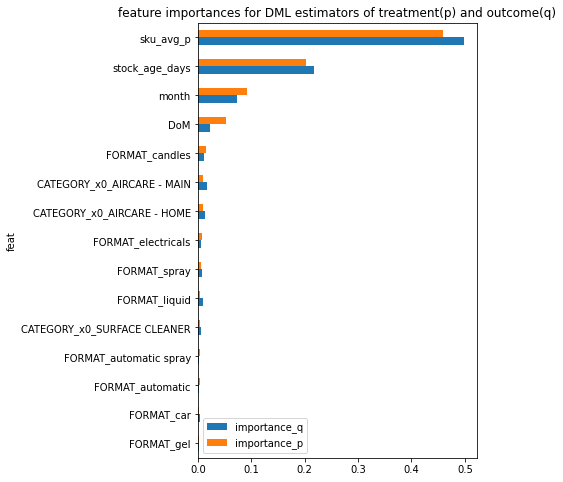

In [ ]:
feat_imp = pd.DataFrame({
    'feat': get_feat_generator_names(model_y['feat_proc']),
    'importance_q': model_y['model_y'].feature_importances_,
    'importance_p': model_t['model_t'].feature_importances_,
}).set_index('feat')

feat_imp.sort_values(
    by='importance_p'
).iloc[-15:].plot.barh(
    figsize=(5, 8), 
    title='feature importances for DML estimators of treatment(p) and outcome(q)'
)

### Step 2: Inferential model for causal elasticity
Now, the inferential model is trying to predict 
 
. After residualizing, dLnP_res is often very small. These values blow up our estimator - so to reduce noisiness, we are dropping all observations with very small residual price variation. Arguably, they don't contain much information anyway, because there is so little price variation left.

There is one more technicality in DML: Chernozhukov proposes using a slightly different estimator of treatment effect than standard OLS for robustness reasons. Instead of taking the standard OLS-solution, 
, Chernozhukov uses the following, de-biased estimator. Note that the first  is residualized, while the second is not, and the third is.

This estimator is fit 2-fold, once on either half of the data (the other half being used for the auxiliary models). The average between both fits is an efficient estimator. Below, DML is implemented "properly": with sample splitting, and debiased estimator.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


fitting model_y
fitting model_t


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


DML elast:  -0.0737510146385254
OLS elasticity for comparison: -0.07410945692809834
fitting model_y
fitting model_t


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


DML elast:  -0.06507890519231768
OLS elasticity for comparison: -0.06485713873886899
DML efficient estimate of elasticity: -0.06941495991542154


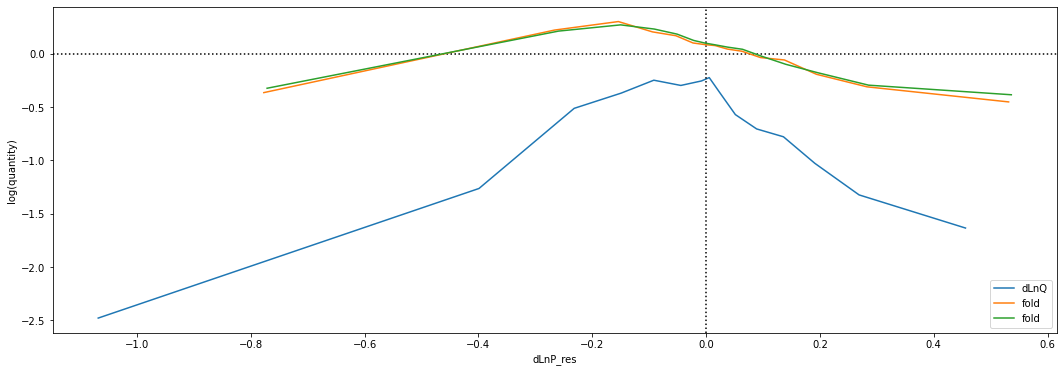

In [ ]:
from sklearn.model_selection import KFold
old_fit = binned_ols(
    df_mdl2,
    x='dLnP',
    y='dLnQ',
    n_bins=15,
    plot_ax=plt.gca(),
)
plt.gca().set(
    xlabel='log(price)',
    ylabel='log(quantity)',    
)
plt.gca().axvline(0, color='k', linestyle=':')
plt.gca().axhline(0, color='k', linestyle=':')


elast_estimates = list()
for idx_aux, idx_inf in KFold(
    n_splits=2, shuffle=True).split(df_mdl2):
    
    df_aux = df_mdl2.iloc[idx_aux]
    df_inf = df_mdl2.iloc[idx_inf].copy()
    
    # step 1: aux models and residualize in inferential set
    print('fitting model_y')
    model_y.fit(df_aux, df_aux.dLnQ)
    print('fitting model_t')
    model_t.fit(df_aux, df_aux.dLnP)
    
    df_inf = df_inf.assign(
        dLnP_res = df_inf['dLnP'] - model_t.predict(df_inf),
        dLnQ_res = df_inf['dLnQ'] - model_y.predict(df_inf),
    )
    
    binned_ols(
        df_inf,
        x='dLnP_res',
        y='dLnQ_res',
        n_bins=15,
        plot_ax=plt.gca(),
        label='fold'
    )
# ignore observations where we residualized away all variation in price
    mask = (~(df_inf.dLnP_res.abs() < 0.01))
    df_inf_censored = df_inf[mask]
    
    # step 2.1: Chernozhukov DML inference
    elast = (
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnQ_res'])
        /
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnP'])
        # the last part here deviates from standard OLS solution
    )
    
    print('DML elast: ', elast)
    elast_estimates.append(elast)

    print('OLS elasticity for comparison:',
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnQ_res'])
        /
        df_inf_censored['dLnP_res'].dot(df_inf_censored['dLnP_res'])
    )    

    elast_estimates.append(elast)

print("DML efficient estimate of elasticity:", np.mean(elast_estimates))